# Forest Fire Analysis

### Felix Egwuagu, Kidus Gorfe, Ellis Porter 

In [1]:
# dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas

import scipy.stats as st
import numpy as np
from scipy.stats import linregress

import requests
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data from csv

fire_df = pd.read_csv("Resources/forestfires.csv")

fire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Column Descriptions

For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

   3. month - month of the year: 'jan' to 'dec' 

   4. day - day of the week: 'mon' to 'sun'

   5. Fine Fuel Moisture Code (FFMC) - moisture condition of forest litter fuels (16hr)

   6. Duff Moisture Code (DMC) - moisture condition of duff under forest litter (360hr)

   7. Drought Code (DC) - moisture condition of deep soil (1272hr)

   8. Initial Spread Index (ISI) - spread potential based on FFMC and windspeed

   9. temp - temperature in Celsius

   10. Relative Humidity (RH) - relative humidity in %

   11. wind - wind speed in km/h

   12. rain - outside rain in mm/(m^2)

   13. area - the burned area of the forest (in ha)


In [3]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
fire_df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
# drop NA
fire_df = fire_df.dropna(how='any')
fire_df.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

In [6]:
# Encode categorical variables (month and day) 
fire_df1 = pd.get_dummies(fire_df, columns=["month", "day"])

# Calculate the correlation matrix 
correlation_matrix = fire_df1.corr()

# Exclude the correlation of area with itself
area_correlations = correlation_matrix["area"].drop("area").sort_values(ascending=False)

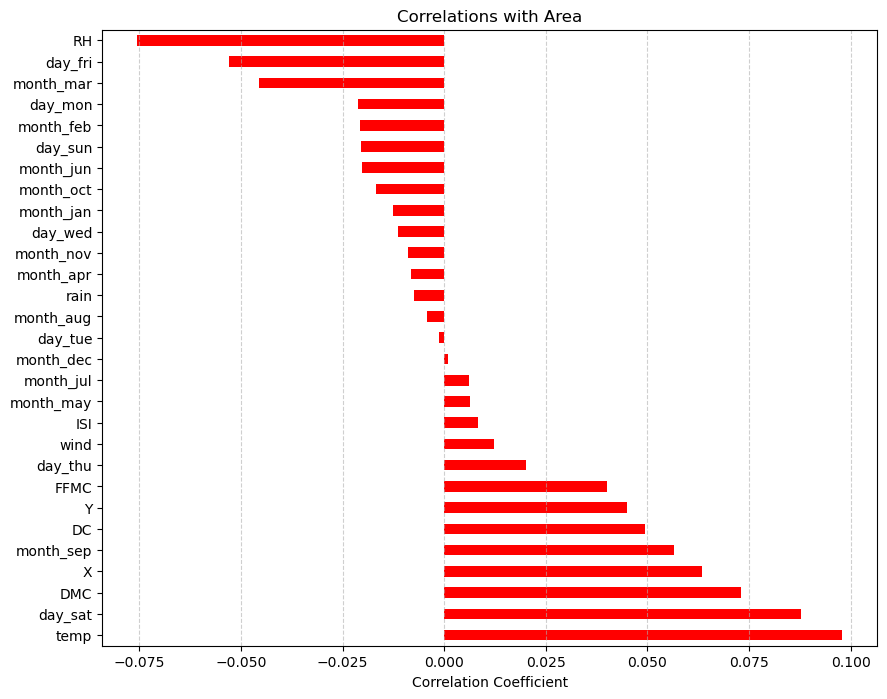

In [7]:
#Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
area_correlations.plot(kind="barh", color="red")
plt.xlabel("Correlation Coefficient")
plt.title("Correlations with Area")
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

In [8]:

#Add Fire Occured Collumn 
fire_df1['fire_occurred'] = (fire_df1['area'] > 0).astype(int)

fire_df1.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,fire_occurred
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,True,False,False,False,False,False,False,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,True,False,False,False,False,False,False,True,False,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,True,False,False,False,True,False,False,False,False,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,True,False,False,False,False,False,False,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,True,False,False,False,0


In [9]:

# Drop the area column
fire_df_no_area = fire_df1.drop(columns=["area"])

# Calculate the correlation matrix
correlation_matrix = fire_df_no_area.corr(method='spearman')

# Set diagonal elements to NaN to exclude self-correlations
np.fill_diagonal(correlation_matrix.values, np.nan)

# Find the correlations with the "fire_occurred" column
fire_occurred_correlations = correlation_matrix["fire_occurred"].sort_values(ascending=False)

print(fire_occurred_correlations)

month_dec        0.127308
temp             0.107407
DMC              0.078801
DC               0.066645
X                0.061355
month_sep        0.058959
Y                0.048640
ISI              0.048387
day_wed          0.048098
FFMC             0.045667
wind             0.033266
day_tue          0.030292
month_aug        0.023512
month_jul        0.020701
day_mon          0.003914
month_may       -0.002775
month_feb       -0.008933
day_thu         -0.010286
RH              -0.010305
day_fri         -0.014529
month_jun       -0.019068
day_sat         -0.019614
month_apr       -0.020731
day_sun         -0.026128
month_nov       -0.046027
month_jan       -0.065155
month_oct       -0.065375
rain            -0.067598
month_mar       -0.116497
fire_occurred         NaN
Name: fire_occurred, dtype: float64


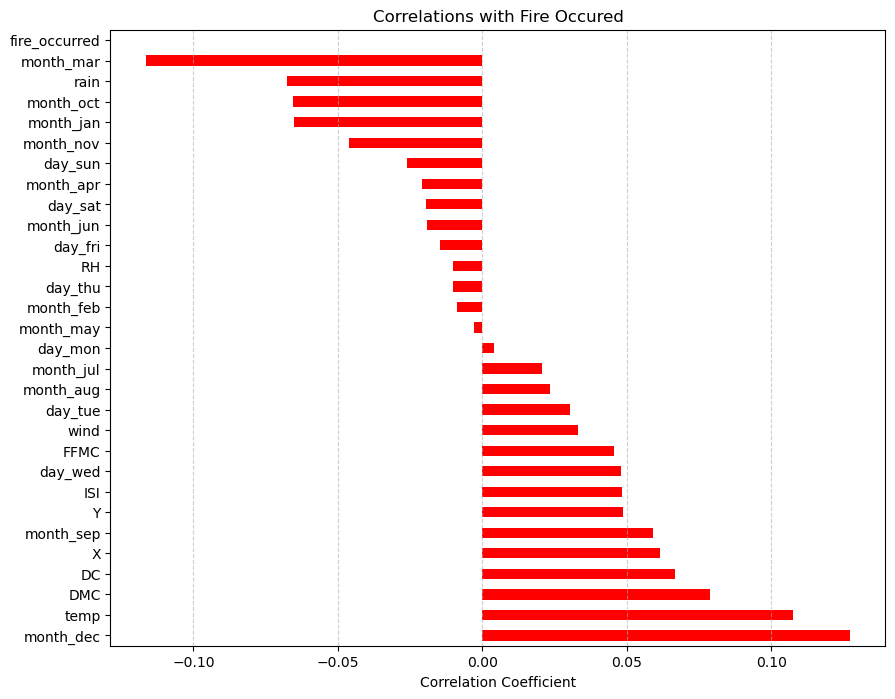

In [10]:

#Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
fire_occurred_correlations.plot(kind="barh", color="red")
plt.xlabel("Correlation Coefficient")
plt.title("Correlations with Fire Occured")
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

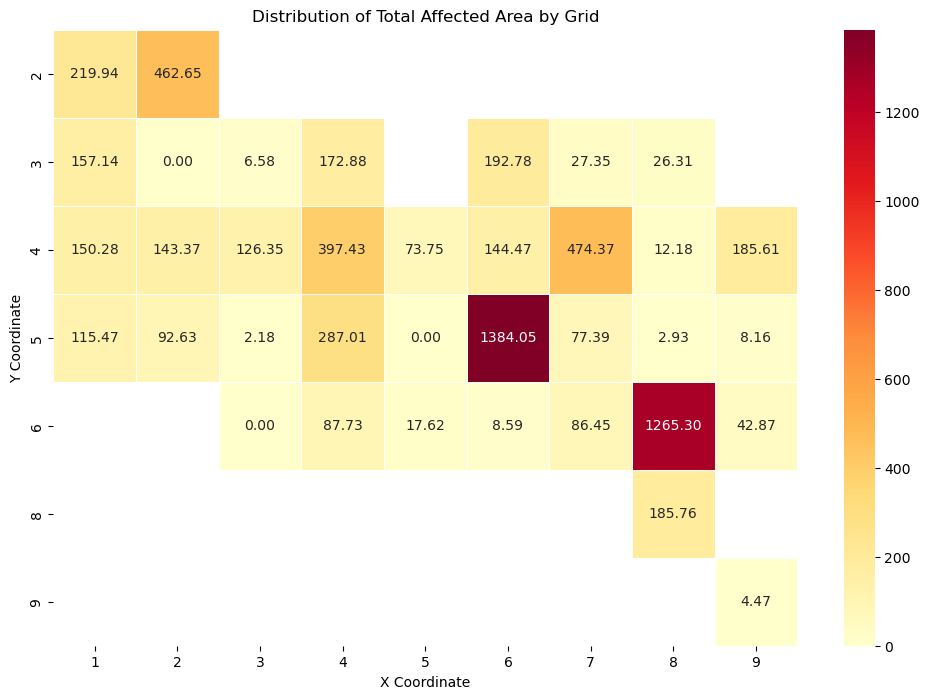

In [11]:
# Group the data by X and Y coordinates and sum the affected area in each grid
spatial_group = fire_df1.groupby(["X", "Y"])["area"].sum().reset_index(name="Total Affected Area")

# Pivot the data to create a grid
heatmap_data = spatial_group.pivot_table(index="Y", columns="X", values="Total Affected Area", aggfunc="sum")

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Distribution of Total Affected Area by Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

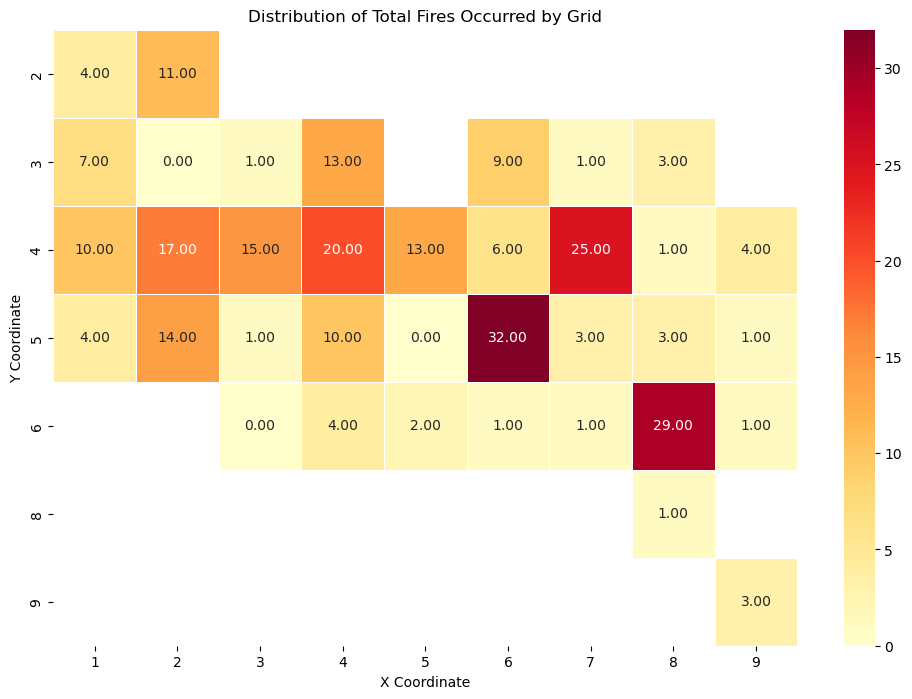

In [12]:

# Group the data by X and Y coordinates and sum the fires that occurred in each grid
spatial_group = fire_df1.groupby(["X", "Y"])["fire_occurred"].sum().reset_index(name="Total Fires Occurred")

# Pivot the data to create a grid
heatmap_data = spatial_group.pivot_table(index="Y", columns="X", values="Total Fires Occurred", aggfunc="sum")

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Distribution of Total Fires Occurred by Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

# Total Area Affected by Fire

### Per Month

In [13]:
# rename months and days
months_ordered = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

months_rename = fire_df.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], months_ordered)
rename_df = months_rename.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], days_ordered)

rename_df['month'] = pd.Categorical(rename_df['month'], categories=months_ordered, ordered=True)

sort_by_months = rename_df.sort_values(by="month")
sort_by_months

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
104,2,4,January,Saturday,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
379,4,5,January,Sunday,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
96,3,4,February,Saturday,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
59,2,2,February,Friday,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
202,7,4,February,Sunday,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,December,Wednesday,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
281,6,5,December,Tuesday,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77
273,4,6,December,Sunday,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
279,4,4,December,Monday,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77


In [14]:
# group by months
month_group = rename_df.groupby("month")

# total area affected per month
area_per_month = month_group["area"].sum()
area_per_month

month
January         0.00
February      125.50
March         235.26
April          80.02
May            38.48
June           99.30
July          459.83
August       2297.99
September    3086.13
October        99.57
November        0.00
December      119.97
Name: area, dtype: float64

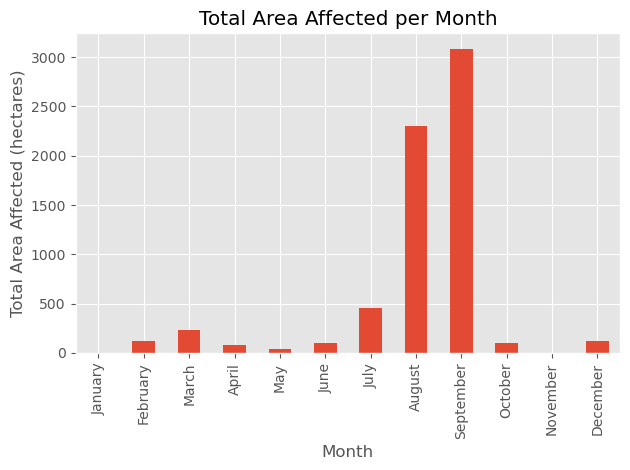

In [47]:
# graph area affected per month

area_per_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Total Area Affected (hectares)")
plt.title("Total Area Affected per Month")
plt.style.use('ggplot')
plt.tight_layout()

plt.savefig("Images/area_per_month.png")
plt.show()

# Total Area Affected by Fire

### Per Day of Week

In [16]:
rename_df['day'] = pd.Categorical(rename_df['day'], categories=days_ordered, ordered=True)
sort_by_day = rename_df.sort_values(by="day")

# group by day
day_group = rename_df.groupby("day", observed=False)

# total area affected per day
area_per_day = day_group["area"].sum()
area_per_day

day
Monday        706.53
Tuesday       807.79
Wednesday     578.60
Thursday      997.10
Friday        447.24
Saturday     2144.86
Sunday        959.93
Name: area, dtype: float64

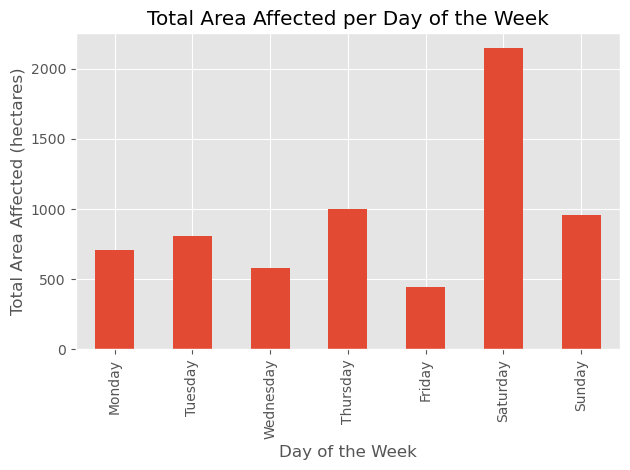

In [17]:
# graph area affected per day

area_per_day.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Total Area Affected (hectares)")
plt.title("Total Area Affected per Day of the Week")
plt.style.use('ggplot')
plt.tight_layout()

plt.savefig("Images/area_per_day.png")
plt.show()

# Drop 0.0 Area

In [18]:
# drop 0.0 area rows
non0_df= rename_df[rename_df["area"] != 0]
non0_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 138 to 514
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X       270 non-null    int64   
 1   Y       270 non-null    int64   
 2   month   270 non-null    category
 3   day     270 non-null    category
 4   FFMC    270 non-null    float64 
 5   DMC     270 non-null    float64 
 6   DC      270 non-null    float64 
 7   ISI     270 non-null    float64 
 8   temp    270 non-null    float64 
 9   RH      270 non-null    int64   
 10  wind    270 non-null    float64 
 11  rain    270 non-null    float64 
 12  area    270 non-null    float64 
dtypes: category(2), float64(8), int64(3)
memory usage: 26.6 KB


In [19]:
# rename months and days

non0_months_rename = non0_df.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], months_ordered)
non0_rename_df = non0_months_rename.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], days_ordered)

non0_rename_df['month'] = pd.Categorical(non0_rename_df['month'], categories=months_ordered, ordered=True)

# Days with Active Fire

In [20]:
non0_sort_by_months = non0_rename_df.sort_values(by="month")

# group by months
non0_month_group = non0_rename_df.groupby("month")

# count fires per month
non0_fires_per_month = non0_month_group["month"].count()
non0_fires_per_month

month
January       0
February     10
March        19
April         4
May           1
June          8
July         18
August       99
September    97
October       5
November      0
December      9
Name: month, dtype: int64

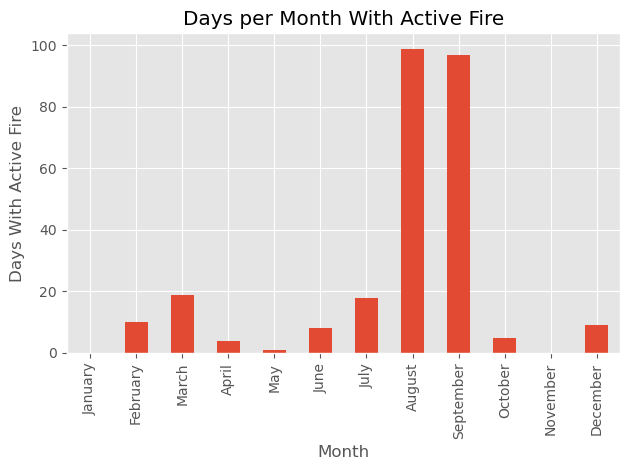

In [21]:
# graph fires per month
non0_fires_per_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Days With Active Fire")
plt.title("Days per Month With Active Fire")
plt.style.use('ggplot')
plt.tight_layout()

plt.savefig("Images/fire_per_month.png")
plt.show()

In [22]:
non0_rename_df['day'] = pd.Categorical(non0_rename_df['day'], categories=days_ordered, ordered=True)
non0_sort_by_day = non0_rename_df.sort_values(by="day")

# group by day
non0_day_group = non0_rename_df.groupby("day")

# count fires per month
non0_fires_per_day = non0_day_group["day"].count()
non0_fires_per_day

day
Monday       39
Tuesday      36
Wednesday    32
Thursday     31
Friday       43
Saturday     42
Sunday       47
Name: day, dtype: int64

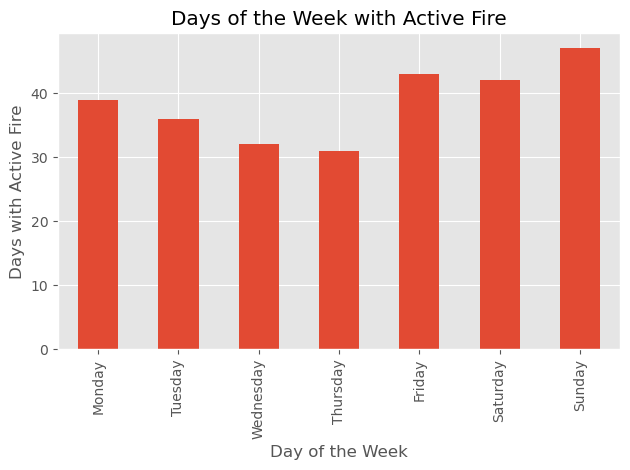

In [23]:
# graph fires per day of the week
non0_fires_per_day.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Days with Active Fire")
plt.title("Days of the Week with Active Fire")
plt.style.use('ggplot')
plt.tight_layout()

plt.savefig("Images/fire_per_day.png")
plt.show()

# Regression Analysis

In [24]:
# remove zeroes from the impacted area  column
non0_df= fire_df[fire_df["area"] != 0]

In [25]:
# sort the impacted area column
highest_fire_area = non0_df.sort_values(by="area", ascending=True)

The r-squared is: 0.012


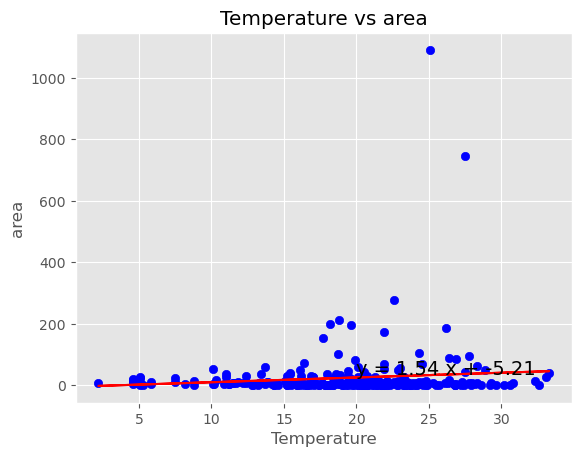

In [26]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["temp"],highest_fire_area["area"])
regress_values=highest_fire_area["temp"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["temp"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["temp"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Temperature")
plt.ylabel("area")
plt.title("Temperature vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

In [27]:
# logarithmic transform of area

highest_fire_area['logarea'] = np.log(1 + highest_fire_area['area'])

The r-squared is: 0.0


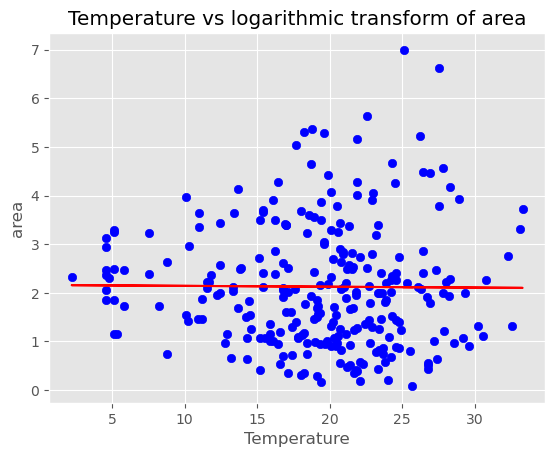

In [28]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["temp"],highest_fire_area['logarea'])
regress_values=highest_fire_area["temp"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["temp"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["temp"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Temperature")
plt.ylabel("area")
plt.title("Temperature vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


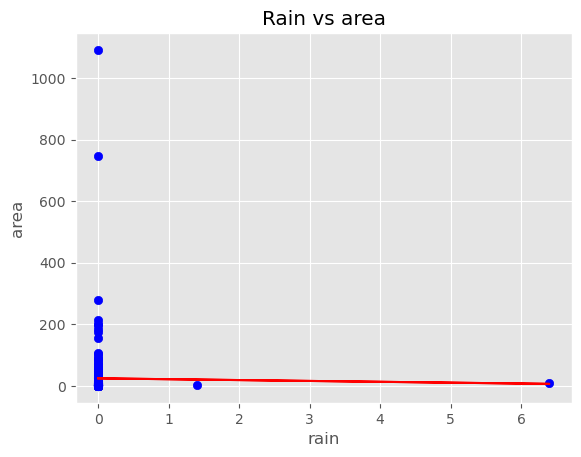

In [29]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["rain"],highest_fire_area["area"])
regress_values=highest_fire_area["rain"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["rain"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["rain"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("rain")
plt.ylabel("area")
plt.title("Rain vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


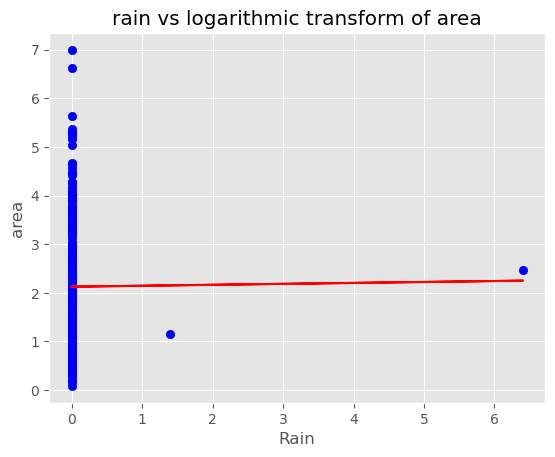

In [30]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["rain"],highest_fire_area['logarea'])
regress_values=highest_fire_area["rain"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["rain"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["rain"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Rain")
plt.ylabel("area")
plt.title("rain vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.011


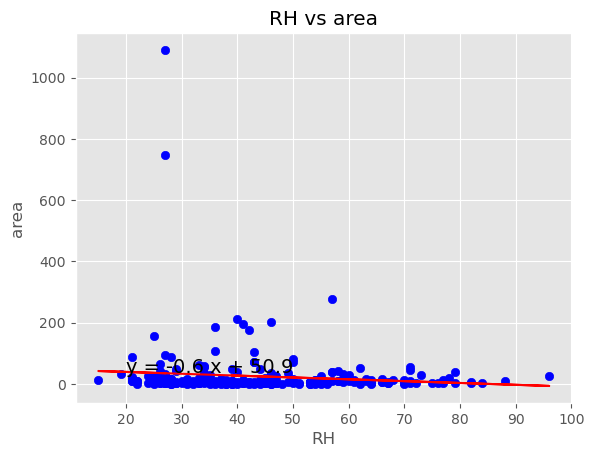

In [31]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["RH"],highest_fire_area["area"])
regress_values=highest_fire_area["RH"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["RH"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["RH"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("RH")
plt.ylabel("area")
plt.title("RH vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.004


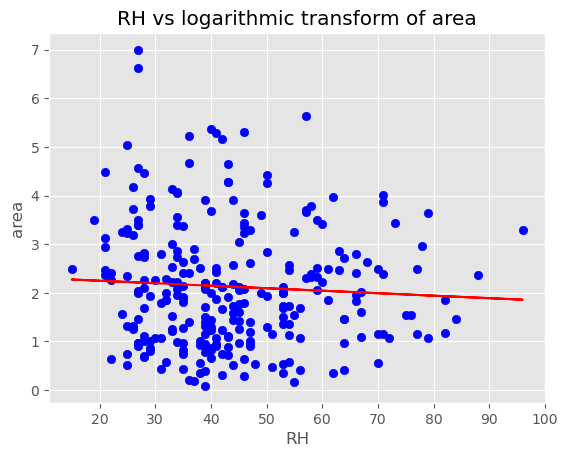

In [32]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["RH"],highest_fire_area['logarea'])
regress_values=highest_fire_area["RH"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["RH"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["RH"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("RH")
plt.ylabel("area")
plt.title("RH vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


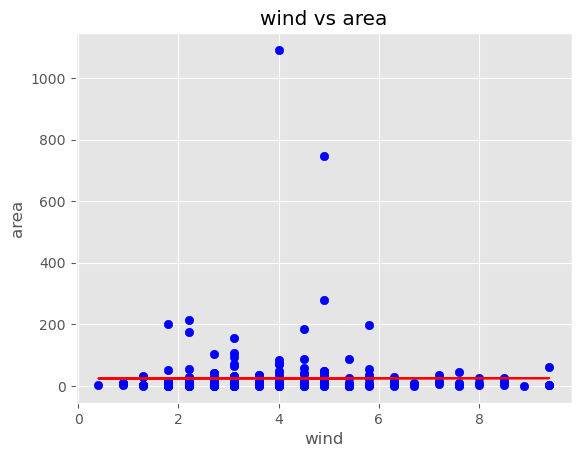

In [33]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["wind"],highest_fire_area["area"])
regress_values=highest_fire_area["wind"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["wind"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["wind"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("wind")
plt.ylabel("area")
plt.title("wind vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.002


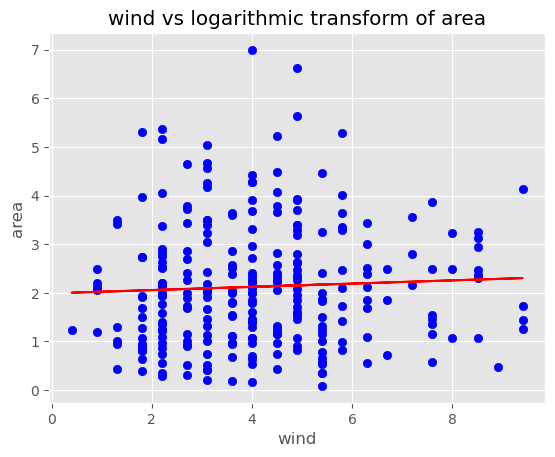

In [34]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["wind"],highest_fire_area['logarea'])
regress_values=highest_fire_area["wind"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["wind"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["wind"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("wind")
plt.ylabel("area")
plt.title("wind vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.003


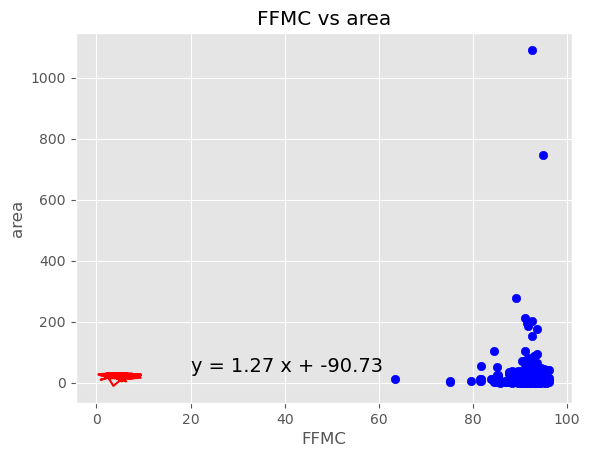

In [35]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["FFMC"],highest_fire_area["area"])
regress_values=highest_fire_area["FFMC"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["FFMC"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["wind"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("FFMC")
plt.ylabel("area")
plt.title("FFMC vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.001


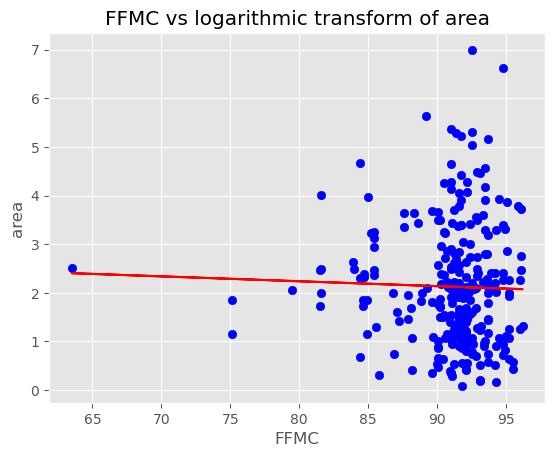

In [36]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["FFMC"],highest_fire_area['logarea'])
regress_values=highest_fire_area["FFMC"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["FFMC"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["FFMC"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("FFMC")
plt.ylabel("area")
plt.title("FFMC vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.008


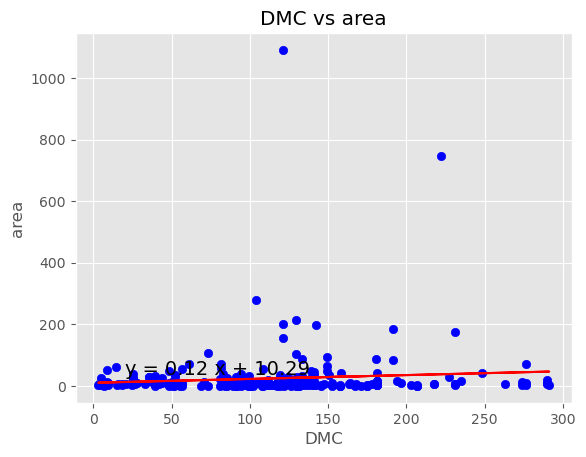

In [37]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["DMC"],highest_fire_area["area"])
regress_values=highest_fire_area["DMC"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["DMC"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["DMC"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("DMC")
plt.ylabel("area")
plt.title("DMC vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.002


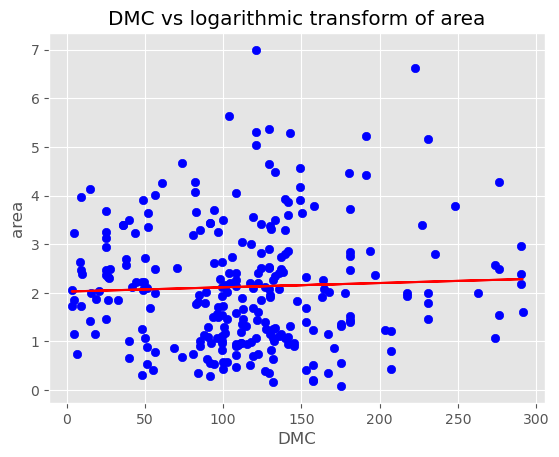

In [38]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["DMC"],highest_fire_area['logarea'])
regress_values=highest_fire_area["DMC"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["DMC"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["DMC"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("DMC")
plt.ylabel("area")
plt.title("DMC vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.002


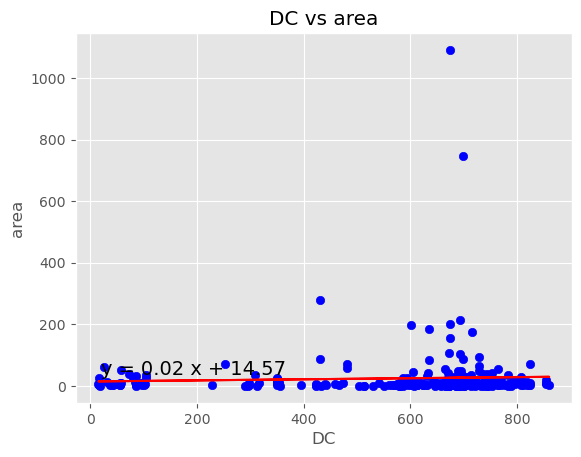

In [39]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["DC"],highest_fire_area["area"])
regress_values=highest_fire_area["DC"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["DC"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["DC"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("DC")
plt.ylabel("area")
plt.title("DC vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


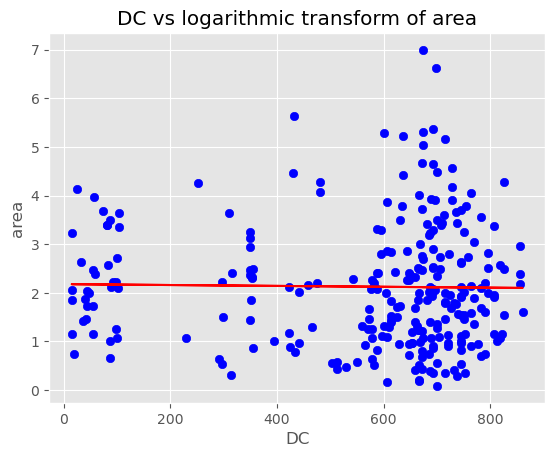

In [40]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["DC"],highest_fire_area['logarea'])
regress_values=highest_fire_area["DC"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["DC"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["DC"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("DC")
plt.ylabel("area")
plt.title("DC vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


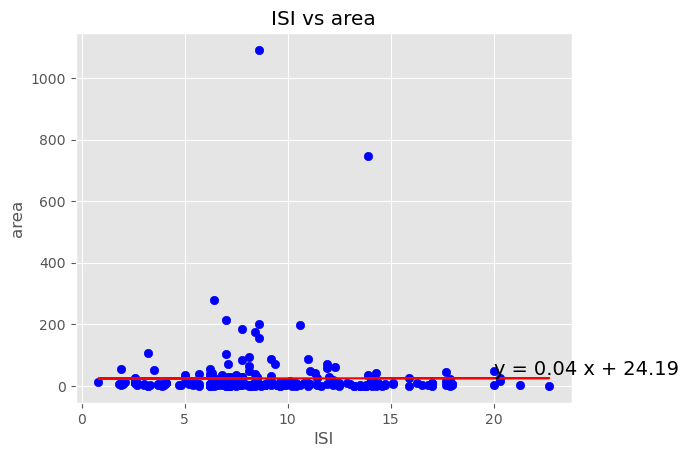

In [41]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["ISI"],highest_fire_area["area"])
regress_values=highest_fire_area["ISI"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["ISI"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["ISI"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("ISI")
plt.ylabel("area")
plt.title("ISI vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.008


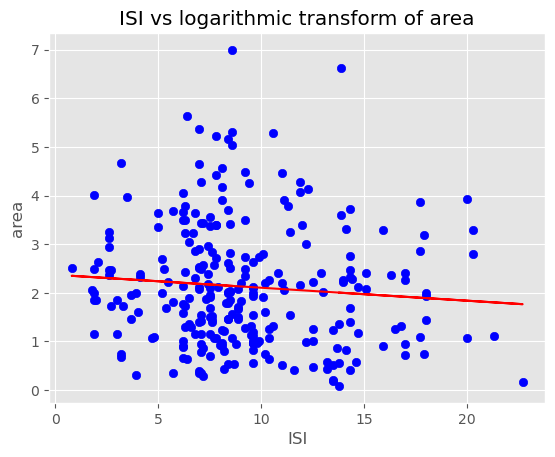

In [42]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["ISI"],highest_fire_area['logarea'])
regress_values=highest_fire_area["ISI"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["ISI"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["ISI"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("ISI")
plt.ylabel("area")
plt.title("ISI vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.005


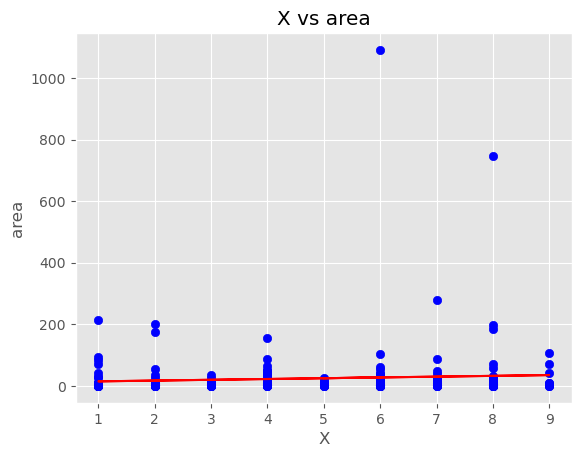

In [43]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["X"],highest_fire_area["area"])
regress_values=highest_fire_area["X"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["X"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["X"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("X")
plt.ylabel("area")
plt.title("X vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.001


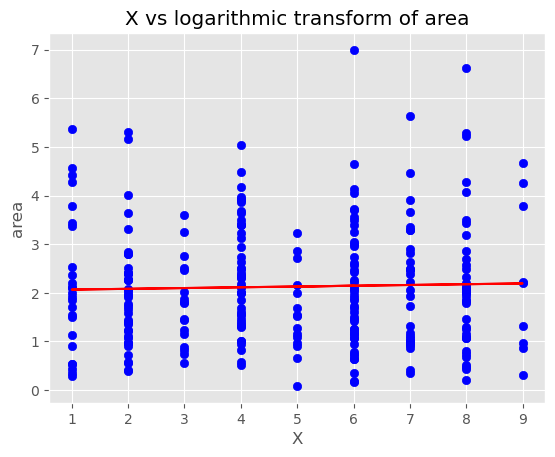

In [44]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["X"],highest_fire_area['logarea'])
regress_values=highest_fire_area["X"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["X"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["X"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("X")
plt.ylabel("area")
plt.title("X vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.003


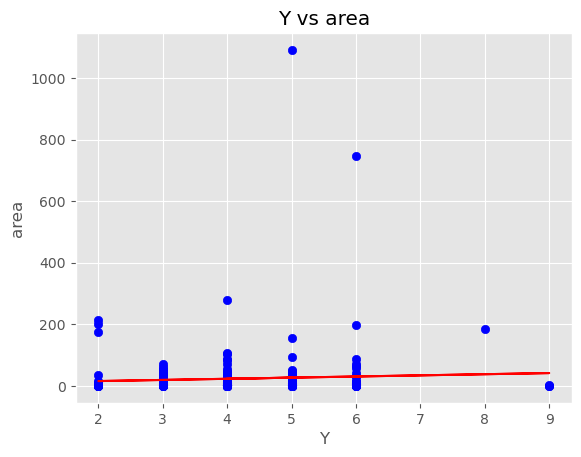

In [45]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["Y"],highest_fire_area["area"])
regress_values=highest_fire_area["Y"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["Y"],highest_fire_area["area"],color='b')
plt.plot(highest_fire_area["Y"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Y")
plt.ylabel("area")
plt.title("Y vs area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


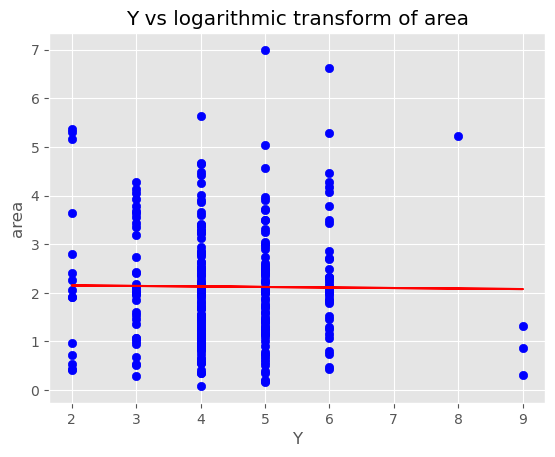

In [46]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(highest_fire_area["Y"],highest_fire_area['logarea'])
regress_values=highest_fire_area["Y"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(highest_fire_area["Y"],highest_fire_area['logarea'],color='b')
plt.plot(highest_fire_area["Y"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Y")
plt.ylabel("area")
plt.title("Y vs logarithmic transform of area")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()